Author: Giovanni Bignardi -- 100355842@alumnos.uc3m.es

Date: February 15, 2017




# Machine Learning

## Session #2: Linear and Nonlinear SVM

The aim of this session is to get familiar with the SVM implementation of scikit-learn. 
The documentation can be found at <a href = http://scikit-learn.org/stable/modules/svm.html>  scikit-learn.org/stable/modules/svm.html</a>




## Required packages:

    * numpy
    * matpltlib.pyplot
    * sklearn (svm, cross_validation.train_test_split)
    
    

The iPython Notebook should be sent using the assignment activity module (See Aula Global). The deadline for submitting your reports ends on **February 22**. **The iPython Notebook should indicate your names and your email address**. 


### 1. Linear SVM

a) Generate a two-dimensional linearly separable dataset with 300 samples. We consider a two-class balanced classification problem. The samples from the first class are normally distributed with $\mu=0$ and $\sigma=1.5$, while the samples from the second class have $\mu=3$ and $\sigma=1.5$. 

    * Use a Scatter plot to show the data in a two-dimensional space and give a different color to each class. 
    
b) Fit a linear SVC using part of the data in X as training set (X_train, y_train) and holding out part of the available data as a test set (X_test, y_test). 

c) Get and plot the separating hyperplane and the parallels to the separating hyperplane that pass through the support vectors. How about the number of support vectors?

d) Compute the classification scores both on training and test sets.

e) Fit the model for different values of the penalty parameter C (from very low values to very high ones). Study the influence of this parameter on the classification score and on the number of support vectors. Why the margin is larger for low values of C than it is for higher values?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

a) Generate a two-dimensional linearly separable dataset with 300 samples. We consider a two-class balanced classification problem. The samples from the first class are normally distributed with $\mu=0$ and $\sigma=1.5$, while the samples from the second class have $\mu=3$ and $\sigma=1.5$. 

    * Use a Scatter plot to show the data in a two-dimensional space and give a different color to each class.

In [2]:
np.random.seed(23)

x1 = 1.5*np.random.randn(150,2)+0
x2 = 1.5*np.random.randn(150,2)+3

In [3]:
x = np.concatenate((x1,x2), axis=0)

In [4]:
x[:15,]

array([[ 1.00048208,  0.03871962],
       [-1.16642912,  1.42295073],
       [ 1.05250769, -1.57662235],
       [-0.55132217, -1.70618954],
       [-1.98322128,  2.65838742],
       [-0.52118849,  1.00521024],
       [ 0.48340728,  0.0905144 ],
       [-1.565175  , -1.51491281],
       [ 0.66260456,  1.69331528],
       [-2.75710165, -1.40815295],
       [-0.30276078,  1.56805692],
       [ 0.80724295,  1.218178  ],
       [ 0.36165945, -1.4287643 ],
       [-0.20440013,  1.90087231],
       [ 0.26045047, -1.83488216]])

In [5]:
clas = np.zeros((300,1))
for i in range(0,300):
    if i<150: clas[i,0]=1
    else: clas[i,0]=2

x = np.concatenate((x,clas), axis=1)

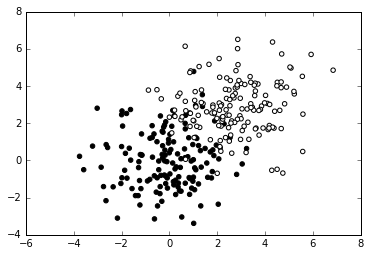

In [6]:
%matplotlib inline
import matplotlib
color = [item%23 for item in x[:,2]]
plt.scatter(x[:,0],x[:,1], c=color)
plt.gray()
plt.show()

b) Fit a linear SVC using part of the data in X as training set (X_train, y_train) and holding out part of the available data as a test set (X_test, y_test). 

c) Get and plot the separating hyperplane and the parallels to the separating hyperplane that pass through the support vectors. How about the number of support vectors?

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x[:,(0,1)], x[:,2], test_size=0.33, random_state=42)

[19 19]


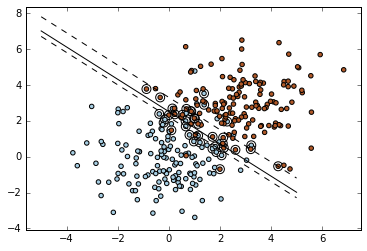

In [8]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print(clf.n_support_)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(x[:, 0], x[:, 1], c=x[:,2], cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

d) Compute the classification scores both on training and test sets.

In [9]:
print('score on train partition is =', round(clf.score(X_train,y_train),3))

score on train partition is = 0.945


In [10]:
print('score on test partition is =' ,round(clf.score(X_test,y_test),3))

score on test partition is = 0.889


e) Fit the model for different values of the penalty parameter C (from very low values to very high ones). Study the influence of this parameter on the classification score and on the number of support vectors. Why the margin is larger for low values of C than it is for higher values?

With c= 1e-100 
train score is 0.517 and test score is 0.465 .
The number of support vector for each class is [97 97]


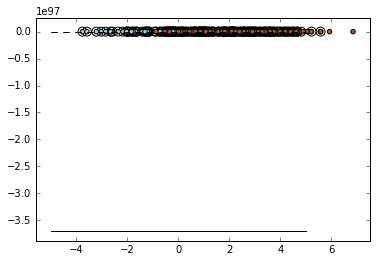

With c= 0.0001 
train score is 0.517 and test score is 0.465 .
The number of support vector for each class is [97 97]


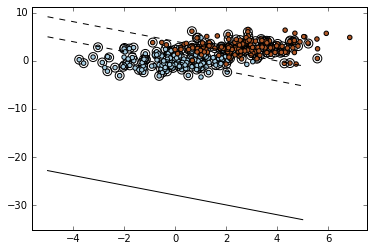

With c= 0.001 
train score is 0.945 and test score is 0.889 .
The number of support vector for each class is [84 84]


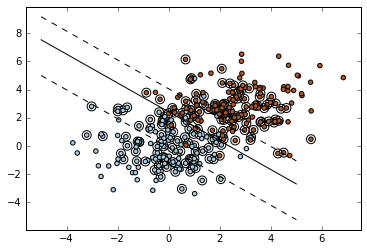

With c= 1 
train score is 0.945 and test score is 0.889 .
The number of support vector for each class is [19 19]


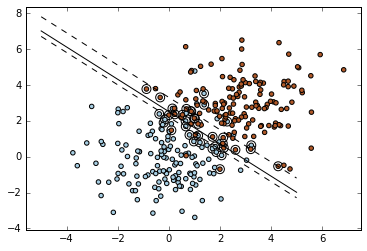

With c= 10 
train score is 0.945 and test score is 0.889 .
The number of support vector for each class is [18 18]


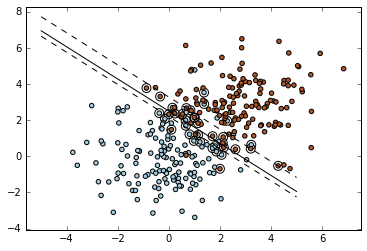

With c= 100 
train score is 0.945 and test score is 0.889 .
The number of support vector for each class is [18 18]


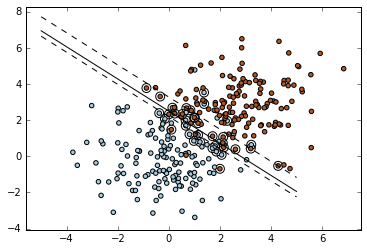

With c= 10000 
train score is 0.945 and test score is 0.889 .
The number of support vector for each class is [18 18]


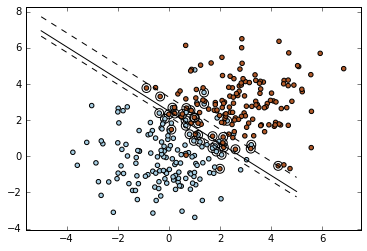

In [11]:
c = [1e-100,0.0001,0.001,1,10,100,10000] # 1 is the default value for C

for i in c:
    clf = SVC(kernel='linear', C=i)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    print('With c=', i, '\ntrain score is', round(clf.score(X_train,y_train),3), 
          'and test score is', round(test_score, 3),
          '.\nThe number of support vector for each class is', clf.n_support_)
    
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    
    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
    plt.scatter(x[:, 0], x[:, 1], c=x[:,2], cmap=plt.cm.Paired)
    
    plt.axis('tight')
    plt.show()

In a SVM you are searching for two things: a hyperplane with the largest minimum margin, and a hyperplane that correctly separates as many instances as possible. The problem is that you will not always be able to get both things. The C parameter determines how great your desire is for the latter: it tells the SVM optimization how much you want to avoid misclassifying each training example. 

The number of support vectors depends on how much slack it's allowed and on the distribution of the data. If I allow a large amount of slack (low values of C), I will have a large number of support vectors; if I allow very little slack (high values of C), I will have very few support vectors.

+ A small value of C will cause the optimizer to look for a larger-margin separating hyperplane, decreasing the value of C the dynamic remains the same even if that hyperplane misclassifies ever more points. That's why for smaller values of C I get an increased number of suppor vectors.

+ Conversely, for large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Thus, while soaring C, the number of support vectors drops and after a certain threshold (in this case c=10) it remains constant, because the trainig points are mostly classified correctely.

### 2. Nonlinear SVM

a) Generate a two-dimensional non-linearly separable dataset with 300 samples. For that, start from a two-dimensional array (X) of normally distributed data and get a target vector (y) using the logical XOR operator. 

b) Visualize the data using a scatter plot and give a different color to each class. 

c) Fit a RBF kernel SVC using the default parameters. Plot the decision function for each datapoint (you can take as baseline the function plot_svm_nonlinear.py from <a href = http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html> scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html</a>)

d) Study how the kernel parameter $\gamma$ and the penalty parameter C affect the shape of the decision function. Tune these parameters to obtain:
    * A decision boundary almost linear
    * A very sharp decision boundary
    * A curved, smooth decision boundary
    
e) Fit a Polynomial kernel SVC with degreees 1, 2, 3, 4. Interprete the results.


***

a) Generate a two-dimensional non-linearly separable dataset with 300 samples. For that, start from a two-dimensional array (X) of normally distributed data and get a target vector (y) using the logical XOR operator.

In [12]:
np.random.seed(23)

X = np.random.randn(300,2)
X2 = X>0
y = np.logical_xor(X2[:,0],X2[:,1])

b) Visualize the data using a scatter plot and give a different color to each class. 

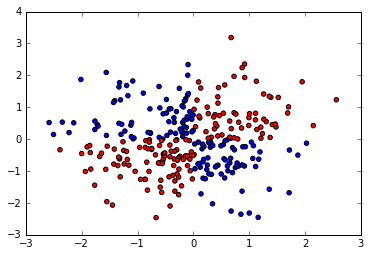

In [13]:
import matplotlib

%matplotlib inline
import matplotlib
colors = ['red','blue']
plt.scatter(X[:,0],X[:,1], c=y, cmap = matplotlib.colors.ListedColormap(colors))

plt.show()

***
c) Fit a RBF kernel SVC using the default parameters. Plot the decision function for each datapoint (you can take as baseline the function plot_svm_nonlinear.py from <a href = http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html> scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html</a>)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

clf = SVC(kernel='rbf')

clf = clf.fit(X_train, y_train)

print('score on train partition is =', round(clf.score(X_train,y_train),3))

print('score on test partition is =' ,round(clf.score(X_test,y_test),3))

score on train partition is = 0.948
score on test partition is = 0.911


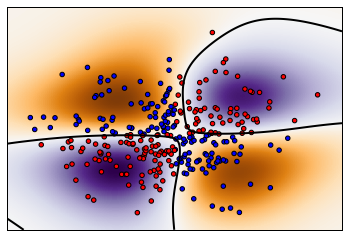

In [15]:
# plot the decision function for each datapoint on the grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 4, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:,0],X[:,1], c=y, cmap = matplotlib.colors.ListedColormap(colors))
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 4])
plt.show()

***

d) Study how the kernel parameter γγ and the penalty parameter C affect the shape of the decision function. Tune these parameters to obtain:

* A decision boundary almost linear
* A very sharp decision boundary
* A curved, smooth decision boundary

***

Data which is linearly nonseparable in ${R^{N}}$ may be linearly separable in a higher-dimensional space ${R^{M}}$, where ${M>N}$

It turns out that the SVM has no need to explicitly work in the higher-dimensional space at training or testing time. One can show that during training, the optimization problem only uses the training examples to compute pair-wise dot products ${(\vec{x_{i}},\vec{x_{j}})}$, where ${\vec{x_{i}}, \vec{x_{j}} \in R^{N}}$.

Why is this significant? It turns out that there exist functions that, given two vectors ${\vec{v}}$ and ${\vec{w}}$ in ${R^{N}}$, implicitly computes the dot product between ${\vec{v}}$ and ${\vec{w}}$ in a higher-dimensional ${R^{M}}$ without explicitly transforming ${\vec{v}}$ and ${\vec{w}}$ to ${R^{M}}$. Such functions are called kernel functions. Sklearn's implementation ''svm.SVC'' has a kernel parameter which can take on linear, poly, rbf, or sigmoid kernels.

The gamma parameter of the ''svm.SVC'' function defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

In [19]:
from sklearn.grid_search import GridSearchCV

c = [1e-100,0.0001,0.001,1,10,100,10000]
yy = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = {'C': c, 'gamma': yy}

np.random.seed(0)
clf = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=-1, verbose=0)

clf.fit(X_train,y_train)

print('With the parametes', clf.best_params_, '\ntrain score is', round(clf.score(X_train,y_train),3), 
          'and test score is', round(test_score, 3))

With the parametes {'C': 100, 'gamma': 1} 
train score is 0.995 and test score is 0.889


/home/gio/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:438: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


RBF kernel: ${\exp(-\gamma |x-x'|^2)}$.

Gamma as a parameter of the RBF kernel and can be thought of as the 'spread' of the kernel and therefore the decision region. When gamma is low, the 'curve' of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the 'curve' of the decision boundary is extremized, the precision researched increase at such a level that it could arrive to create islands of decision-boundaries around data points (this obviously indicates an extreme overfitting), as it can be seen below:

gamma = 0.001

Because of this we're going to obtain a linear decision boundary when gamma is almost zero,
because the curvature determined by gamma would be very low


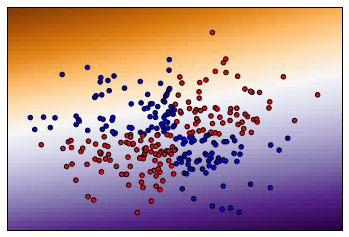

gamma = 0.05

Increasing gamma we experiment a more detectable curvature in the decision boundary


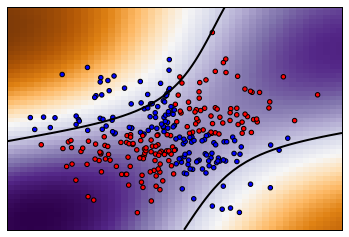

gamma = 10

Sharply rising the values of gamma I am asking a major precision for the classification nd I get sharper boundaries as it can be seen for gamma=10. 
With highest values of gamma they mught appear those islands of decision-boundaries I wrote before.


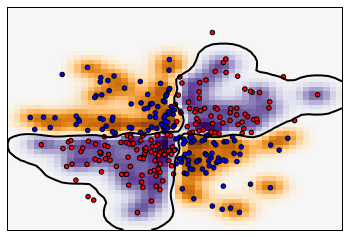

gamma = 100


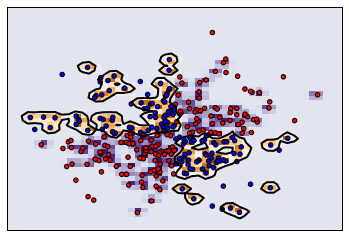

In [28]:
for i in (0.001, 0.05, 10, 100):
    print('gamma =',i)
    if i==0.001:
        print('\nBecause of this we\'re going to obtain a linear decision boundary when gamma is almost zero,\nbecause the curvature determined by gamma would be very low')
    else:
        if i==0.05:
            print('\nIncreasing gamma we experiment a more detectable curvature in the decision boundary')
        else:
            if i==10:
                print('\nSharply rising the values of gamma I am asking a major precision for the classification \and I get sharper boundaries as it can be seen for gamma=10. \nWith highest values of gamma they mught appear those islands of decision-boundaries I wrote before.')
    clf = SVC(kernel='rbf', random_state=0, gamma=i, C=1)
    clf.fit(X_train, y_train)
    xx, yy = np.meshgrid(np.linspace(-3, 3),
                     np.linspace(-3, 4))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
    plt.scatter(X[:,0],X[:,1], c=y, cmap = matplotlib.colors.ListedColormap(colors))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 4])
    plt.show()

***
e) Fit a Polynomial kernel SVC with degreees 1, 2, 3, 4. Interprete the results.

degree = 1


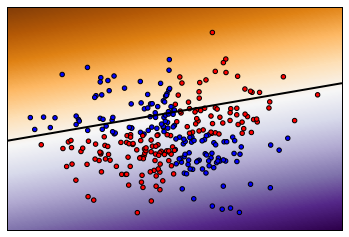

degree = 2


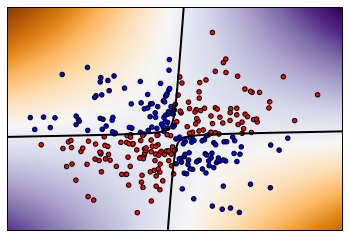

degree = 3


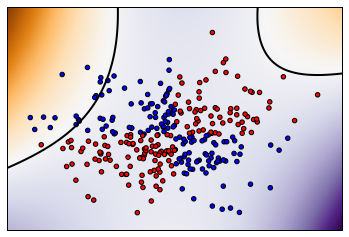

degree = 4


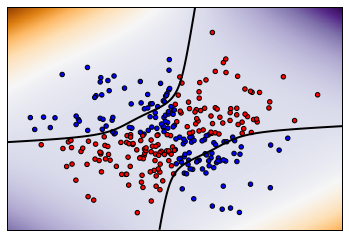

In [18]:
for i in [1,2,3,4]:
    clf = SVC(kernel='poly', degree= i)
    clf.fit(X_train, y_train)
    print('degree =',i)
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 4, 500))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
    plt.scatter(X[:,0],X[:,1], c=y, cmap = matplotlib.colors.ListedColormap(colors))
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 4])
    plt.show()

The **polynomial** is another useful kernel for SVC when data are *non-linearly separable*.

For a general degree-d polynomial, the polynomial kernel is defined as: ${K(x,y)=(x^{T}y+c)^D}$

The degree of the polynomial  kernel influences the flexibility of the resulting  classifier. 
+ A polynomial with the lowest  degree (d=1) is mothing more than a linear kernel, which is evidently not sufficient when a non-linear relationship between features exists.
+ The degree-2 polynomial is already flexible enough to discriminate between the two classes with a sizable margin. 
+ However the cubic polynomial yielded by increasing the degree hyper-parameter to d=3 exceeds in curvature and it's unable to correctely discriminate between the two features.
+ The quartic degree-4 polynomial yields a more similar decision boundary to the quadratic one, albeit with greater curvature (a curvature higher than d=3 as well), which again fails to completely classify the data.

To conclude it can be said that, conversely to what experimented with the previous kernels when tuning the hyper-parameters (C and gamma), an increase in the degree of the polynomial kernel, even if it influences the curvature of the classifier, doesn't determine an over-fitting. The precision has to be searched in the most appropriate polynomial form for the data.